In [1]:
import numpy as np
import pandas as pd

## Fetching Data from Source

In [2]:
test=pd.read_csv("train.csv")

In [3]:
test

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


## Data Pre Processing

### Dropping Columns with missing values and not useful for analysis

In [4]:
test.dropna(1)

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


In [5]:
test

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [6]:
testnew=test.dropna(1)

In [7]:
testnew

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


## Normalising Tweet using NLTK

### Removing  stopwords,comma,abbrevations, etc using Natural Language ToolKit

In [8]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>@')
    Processedtext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',Processedtext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


testnew['text']=testnew['text'].map(lambda s:preprocess(s)) 

<ipython-input-8-c9fd816da634>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testnew['text']=testnew['text'].map(lambda s:preprocess(s))


In [9]:
testnew

,id,text,target
0,1,deeds reason earthquake may allah forgive,1
1,4,forest fire near ronge sask canada,1
2,5,residents asked shelter place notified officer...,1
3,6,people receive wildfires evacuation orders cal...,1
4,7,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...,...
7608,10869,two giant cranes holding bridge collapse nearb...,1
7609,10870,aria_ahrary thetawniest control wild fires cal...,1
7610,10871,utc volcano hawaii,1
7611,10872,police investigating bike collided car little ...,1


## Exploratory Data Analysis

### Histogram of Tweet Length

<ipython-input-13-99911a3577d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testnew["tweet_length"] = testnew["text"].apply(len)
C:\Users\Shnkr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


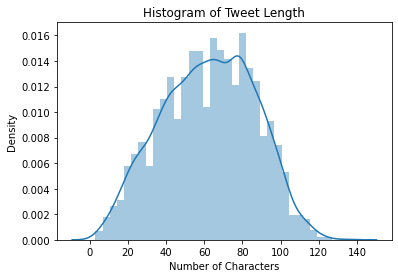

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
testnew["tweet_length"] = testnew["text"].apply(len)
sns.distplot(testnew["tweet_length"])
plt.title("Histogram of Tweet Length")
plt.xlabel("Number of Characters")
plt.ylabel("Density")
plt.show()

In [14]:
testnew

,id,text,target,tweet_length
0,1,deeds reason earthquake may allah forgive,1,41
1,4,forest fire near ronge sask canada,1,34
2,5,residents asked shelter place notified officer...,1,88
3,6,people receive wildfires evacuation orders cal...,1,53
4,7,got sent photo ruby alaska smoke wildfires pou...,1,55
...,...,...,...,...
7608,10869,two giant cranes holding bridge collapse nearb...,1,53
7609,10870,aria_ahrary thetawniest control wild fires cal...,1,88
7610,10871,utc volcano hawaii,1,18
7611,10872,police investigating bike collided car little ...,1,112


### Minimum and Maximum Tweet Length

In [15]:
min(testnew["tweet_length"]), max(testnew["tweet_length"])

(3, 138)

## Distribution of Tweeet Length

C:\Users\Shnkr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shnkr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


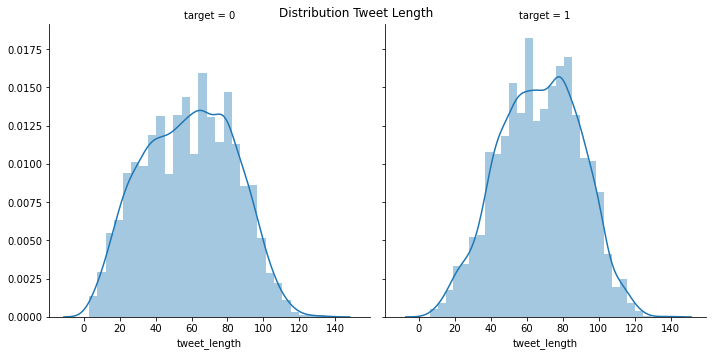

In [16]:
g = sns.FacetGrid(testnew, col="target", height=5)
g = g.map(sns.distplot, "tweet_length")
plt.suptitle("Distribution Tweet Length")
plt.show()

## Histogram of Number of  words per tweets

C:\Users\Shnkr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


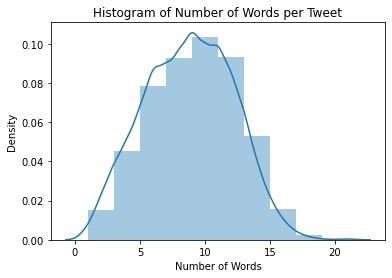

In [17]:
def count_words(x):
    return len(x.split())

testnew["num_words"] = testnew["text"].apply(count_words)
sns.distplot(testnew["num_words"], bins=10)
plt.title("Histogram of Number of Words per Tweet")
plt.xlabel("Number of Words")
plt.ylabel("Density")
plt.show()

## Distribution of Number of Words

C:\Users\Shnkr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shnkr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


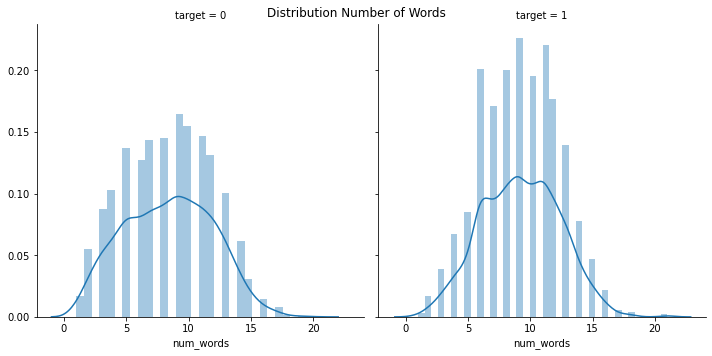

In [18]:
g = sns.FacetGrid(testnew, col="target", height=5)
g = g.map(sns.distplot, "num_words")
plt.suptitle("Distribution Number of Words")
plt.show()

## Average Word Length

C:\Users\Shnkr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


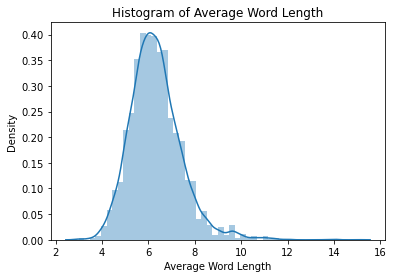

In [19]:
def avg_word_length(x):
    return np.sum([len(w) for w in x.split()]) / len(x.split())

testnew["avg_word_length"] = testnew["text"].apply(avg_word_length)
sns.distplot(testnew["avg_word_length"])
plt.title("Histogram of Average Word Length")
plt.xlabel("Average Word Length")
plt.ylabel("Density")
plt.show()

## Average Word Length for Target 1 & 0

C:\Users\Shnkr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shnkr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


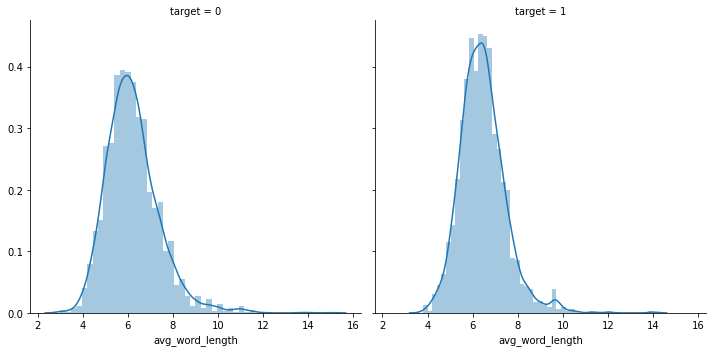

In [20]:
g = sns.FacetGrid(testnew, col="target", height=5)
g = g.map(sns.distplot, "avg_word_length")

## Disaster VS Non Disaster

Not Disaster: 57.03%, Disaster: 42.97%


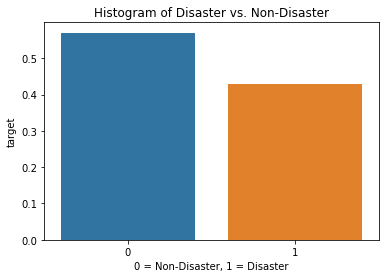

In [21]:
target_vc = testnew["target"].value_counts(normalize=True)
print("Not Disaster: {:.2%}, Disaster: {:.2%}".format(target_vc[0], target_vc[1]))
sns.barplot(x=target_vc.index, y=target_vc)
plt.title("Histogram of Disaster vs. Non-Disaster")
plt.xlabel("0 = Non-Disaster, 1 = Disaster")
plt.show()

## Visualisation of words using WordCloud that signifies Real Disaster

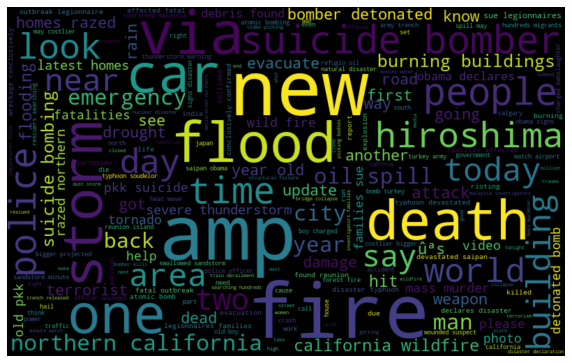

In [22]:
from wordcloud import WordCloud
normal_words =' '.join([text for text in testnew['text'][testnew['target'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Visualisation of words using WordCloud that signifies Not Real Disaster

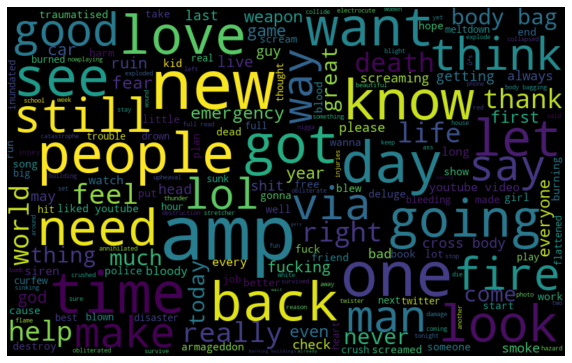

In [23]:
from wordcloud import WordCloud
normal_words =' '.join([text for text in testnew['text'][testnew['target'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Vectorization & Model Prediction

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


In [25]:
tfidf=CountVectorizer(max_features=5000)
A = testnew['text']
B =  testnew['target']

In [26]:
Z = tfidf.fit_transform(A)

In [27]:
print(Z)

  (0, 3620)	1
  (0, 1101)	1
  (0, 2603)	1
  (0, 87)	1
  (0, 1436)	1
  (1, 1432)	1
  (1, 1357)	1
  (1, 2888)	1
  (1, 540)	1
  (2, 3721)	1
  (2, 197)	1
  (2, 4063)	2
  (2, 3295)	2
  (2, 3028)	1
  (2, 1196)	1
  (2, 3090)	1
  (2, 1225)	1
  (3, 1196)	1
  (3, 3090)	1
  (3, 3218)	1
  (3, 3626)	1
  (3, 4877)	1
  (3, 522)	1
  (4, 4877)	1
  (4, 1612)	1
  :	:
  (7610, 4725)	1
  (7610, 4777)	1
  (7610, 1756)	1
  (7611, 556)	1
  (7611, 3347)	1
  (7611, 2387)	1
  (7611, 3775)	1
  (7611, 2421)	1
  (7611, 4013)	1
  (7611, 2069)	1
  (7611, 4517)	1
  (7611, 2954)	1
  (7611, 340)	2
  (7611, 719)	1
  (7611, 3370)	1
  (7611, 4369)	1
  (7611, 2017)	1
  (7612, 522)	1
  (7612, 2916)	1
  (7612, 2308)	1
  (7612, 2962)	1
  (7612, 5)	1
  (7612, 4876)	1
  (7612, 1858)	1
  (7612, 3592)	1


In [28]:
X_test,X_train,y_test,y_train= train_test_split(Z,B,test_size=0.2,random_state=0)

In [29]:
X_train

<1523x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 10554 stored elements in Compressed Sparse Row format>

In [30]:
y_test

1386    0
4048    1
3086    0
272     0
7462    0
       ..
4931    0
3264    1
1653    1
2607    0
2732    0
Name: target, Length: 6090, dtype: int64

In [31]:
print(X_test)

  (0, 2398)	1
  (0, 855)	1
  (0, 112)	2
  (0, 1364)	1
  (0, 244)	1
  (0, 2480)	1
  (0, 2134)	2
  (0, 4755)	1
  (0, 3710)	1
  (0, 501)	1
  (0, 4463)	1
  (0, 4998)	1
  (0, 2750)	1
  (1, 1432)	1
  (1, 1367)	1
  (1, 4961)	1
  (1, 1364)	1
  (1, 4259)	1
  (1, 1334)	1
  (1, 1710)	1
  (1, 4020)	1
  (1, 132)	1
  (1, 481)	1
  (2, 3284)	1
  (2, 802)	1
  :	:
  (6087, 250)	1
  (6087, 1042)	1
  (6087, 645)	1
  (6087, 1540)	1
  (6087, 2122)	1
  (6088, 359)	1
  (6088, 2076)	1
  (6088, 978)	1
  (6088, 4287)	1
  (6088, 277)	1
  (6088, 1246)	1
  (6088, 4241)	1
  (6088, 3014)	1
  (6088, 1390)	1
  (6088, 4576)	1
  (6088, 4070)	1
  (6089, 1204)	1
  (6089, 437)	1
  (6089, 246)	1
  (6089, 1581)	1
  (6089, 2739)	1
  (6089, 13)	1
  (6089, 2497)	1
  (6089, 2701)	1
  (6089, 990)	1


In [32]:
clf=LinearSVC()
clf.fit(X_train,y_train)

LinearSVC()

In [33]:
y_pred=clf.predict(X_test)
print(y_pred)

[0 1 0 ... 0 0 0]


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78      3456
           1       0.71      0.65      0.68      2634

    accuracy                           0.74      6090
   macro avg       0.73      0.72      0.73      6090
weighted avg       0.73      0.74      0.73      6090



## Model Prediction

In [45]:
# h = 'Flood'
h='Good Morning'
o = input("Enter the message\n")
vec= tfidf.transform([o])
Res=clf.predict(vec)
print(Res)

Enter the message
fllod
[0]


In [46]:
vec.shape

(1, 5000)

In [47]:
clf.predict(vec)

array([0], dtype=int64)

In [48]:
 X_test

<6090x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 42459 stored elements in Compressed Sparse Row format>

In [49]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
y_test

1386    0
4048    1
3086    0
272     0
7462    0
       ..
4931    0
3264    1
1653    1
2607    0
2732    0
Name: target, Length: 6090, dtype: int64

In [51]:
import pickle

In [52]:
filename= 'Disater Prediction Model'
pickle.dump(clf,open(filename,'wb'))

## Unpickling Model

In [53]:

loaded_model=pickle.load(open(filename,'rb'))
o = input("Enter the message\n")
vec= tfidf.transform([o])
Res=loaded_model.predict(vec)
print(Res)


Enter the message
flood
[1]


In [54]:
filename= 'TFIDF_Pickle'
pickle.dump(tfidf,open(filename,'wb'))